<a href="https://colab.research.google.com/github/MDA1422/BIDM_Tasks/blob/main/BIDM_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from IPython.display import display, HTML
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable


Mounted at /content/drive



# **Task 1 Exploratory Data Analysis**

**1.1 Data Analysis**

This code performs a detailed data analysis of the Olist e-commerce dataset using Python's pandas, matplotlib, and seaborn libraries. It starts by loading multiple CSV files from a specified folder (/content/drive/MyDrive/olist_data) into a dictionary of dataframes. It then creates visualizations to analyze the data.
First, it analyzes the top 15 sellers by order share and total order count using bar charts. Next, it creates a line plot showing the trend of orders over time. The code also generates a count plot showing the distribution of review scores, a bar chart for payment types, and a histogram for payment installments.
For product data, it creates a heatmap showing the correlation between numerical product features, and for seller data, it creates a count plot showing the distribution of sellers by state. It further merges order and payment data to calculate the total revenue and order count per day, and then computes the Average Order Value (AOV) over time, displaying it using a line plot. Outliers are removed to avoid skewed results. This analysis provides insights into seller performance, customer reviews, payment trends, product characteristics, and sales performance over time.

This shows the top 15 sellers with the most orders compared to all the sellers.

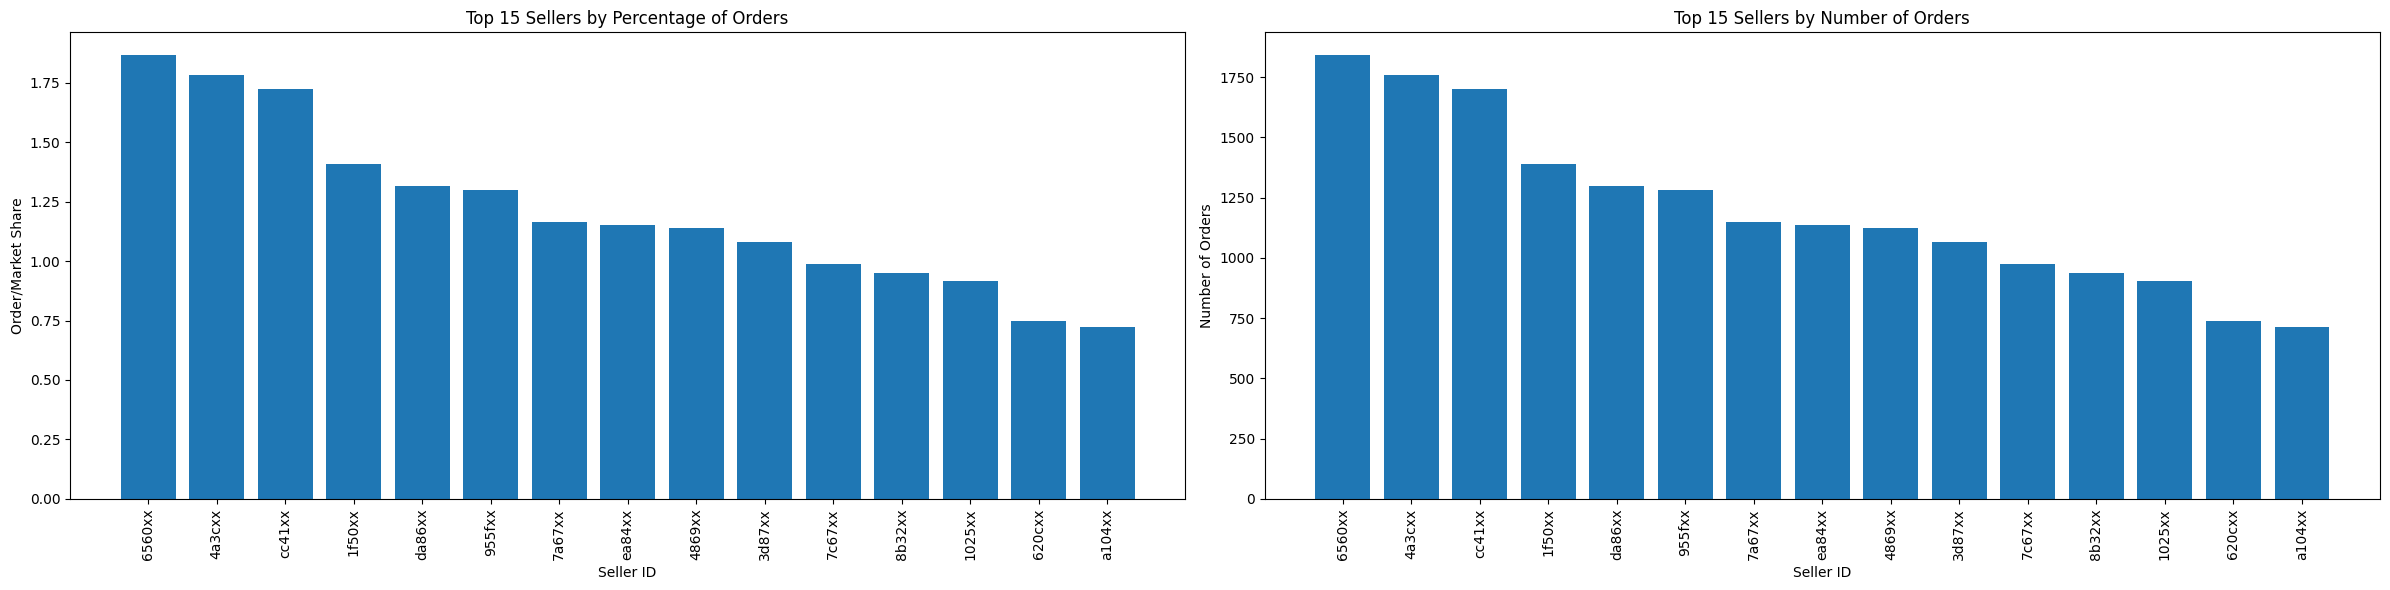

In [ ]:
datasets_path = '/content/drive/MyDrive/olist_data'

dataframes = {}

# Loop through the files in the datasets_path
for filename in os.listdir(datasets_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(datasets_path, filename)

        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path, encoding='latin-1')

        # Store the DataFrame in the dictionary using the filename as the key
        dataframes[filename] = df

df1 = dataframes['olist_orders_dataset.csv']
order_items = dataframes['olist_order_items_dataset.csv']

unique_orders = order_items.drop_duplicates(subset=['order_id'])
seller_order_counts = unique_orders['seller_id'].value_counts()
c = seller_order_counts.head(15)

total_orders = seller_order_counts.sum()
top_15_percentages = (c / total_orders) * 100

# Create subplots for side-by-side display
fig, axes = plt.subplots(1, 2, figsize=(24, 6))  # 1 row, 2 columns

# Plot 1: Top 15 Sellers by Percentage of Orders
axes[0].bar(top_15_percentages.index.str[:4] + ['xx'], top_15_percentages.values)
axes[0].set_xlabel('Seller ID')
axes[0].set_ylabel('Order/Market Share')
axes[0].set_title('Top 15 Sellers by Percentage of Orders')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Plot 2: Top 15 Sellers by Number of Orders
axes[1].bar(c.index.str[:4] + ['xx'], c.values)
axes[1].set_xlabel('Seller ID')
axes[1].set_ylabel('Number of Orders')
axes[1].set_title('Top 15 Sellers by Number of Orders')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Adjust layout and display the plots
plt.tight_layout()
plt.show()



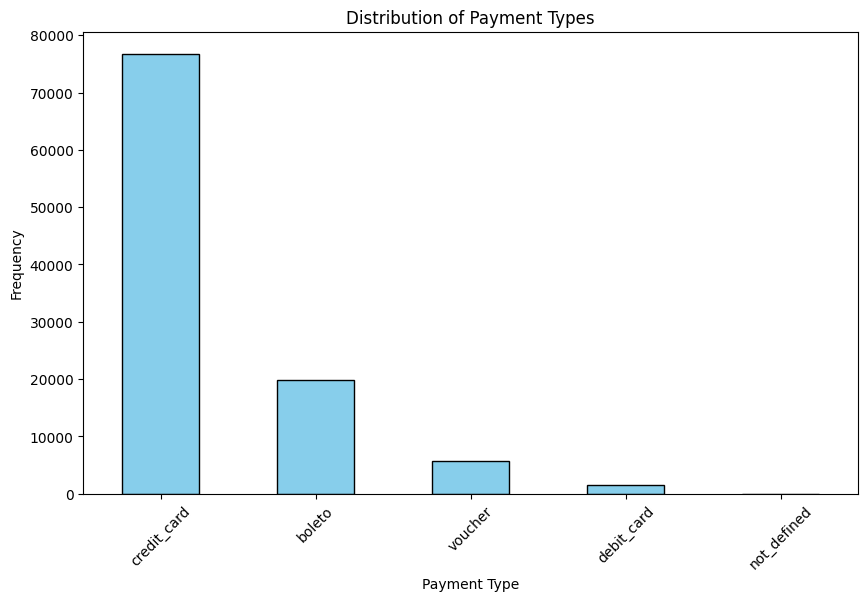

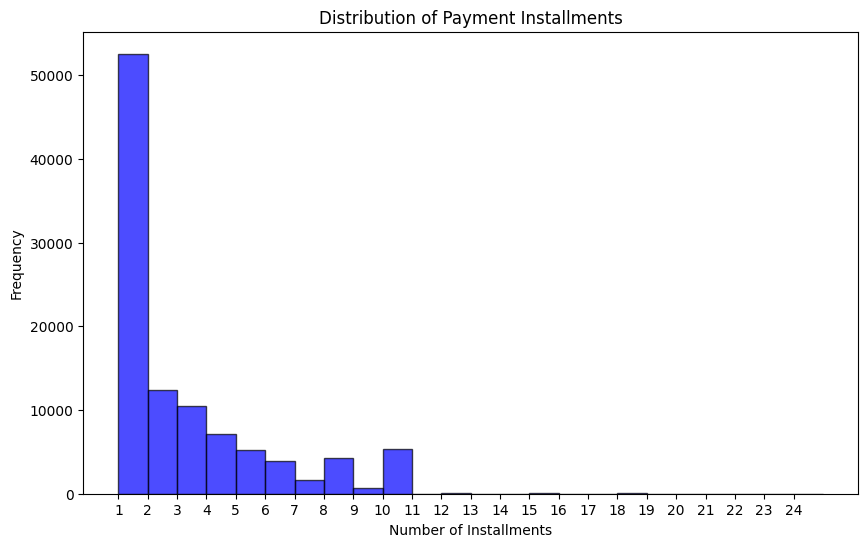

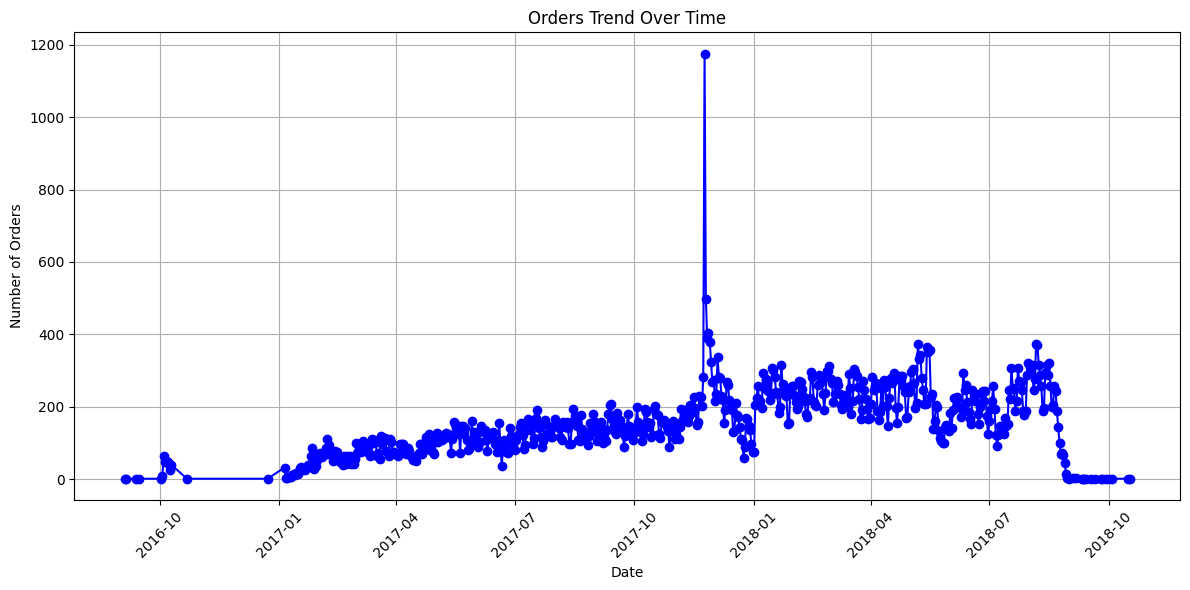

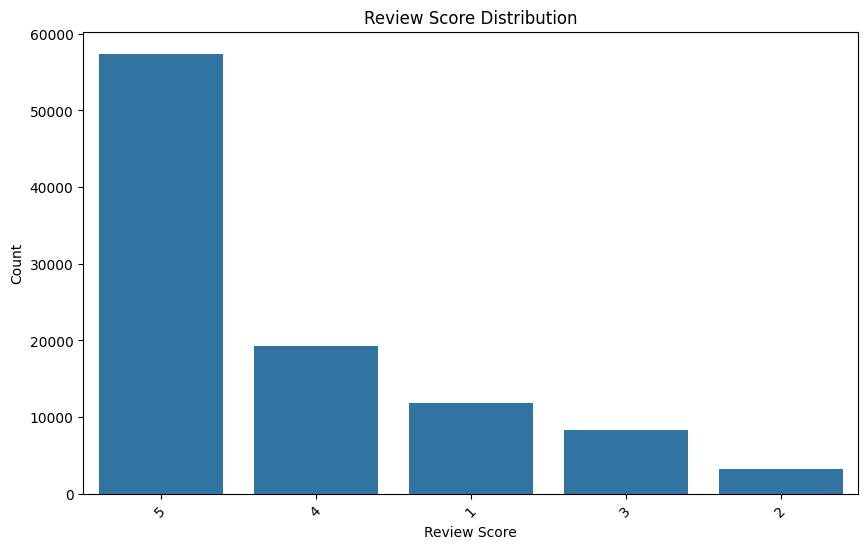

In [ ]:

datasets_path = '/content/drive/MyDrive/olist_data'

# Create an empty dictionary to store the dataframes
dataframes = {}
for filename in os.listdir(datasets_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(datasets_path, filename)

        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path, encoding='latin-1')

        # Store the dataframe in the dictionary
        dataframes[filename] = df

        if filename == 'olist_orders_dataset.csv':
            dataframes[filename]['order_purchase_timestamp'] = pd.to_datetime(dataframes[filename]['order_purchase_timestamp'])

            # Group by date and count the number of orders
            orders_trend = dataframes[filename].groupby(dataframes[filename]['order_purchase_timestamp'].dt.date).size()

            # Create a line chart
            plt.figure(figsize=(12, 6))
            plt.plot(orders_trend.index, orders_trend.values, marker='o', linestyle='-', color='blue')
            plt.title('Orders Trend Over Time')
            plt.xlabel('Date')
            plt.ylabel('Number of Orders')
            plt.xticks(rotation=45)
            plt.grid()
            plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
            plt.show()

        elif filename == 'olist_order_reviews_dataset.csv':
            plt.figure(figsize=(10, 6))
            sns.countplot(data=dataframes[filename], x='review_score', order=dataframes[filename]['review_score'].value_counts().index)
            plt.title('Review Score Distribution')
            plt.xlabel('Review Score')
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.show()

        elif filename == 'olist_order_payments_dataset.csv':

            # distribution of payment types
            payment_type_counts = dataframes[filename]['payment_type'].value_counts()
            plt.figure(figsize=(10, 6))
            payment_type_counts.plot.bar(color='skyblue', edgecolor='black')
            plt.title('Distribution of Payment Types')
            plt.xlabel('Payment Type')
            plt.ylabel('Frequency')
            plt.xticks(rotation=45)
            plt.show()


           # distribution of payment installments
            plt.figure(figsize=(10, 6))
            plt.hist(dataframes[filename]['payment_installments'], bins=range(1, dataframes[filename]['payment_installments'].max() + 2), alpha=0.7, color='blue', edgecolor='black')
            plt.title('Distribution of Payment Installments')
            plt.xlabel('Number of Installments')
            plt.ylabel('Frequency')
            plt.xticks(range(1, dataframes[filename]['payment_installments'].max() + 1))
            plt.show()


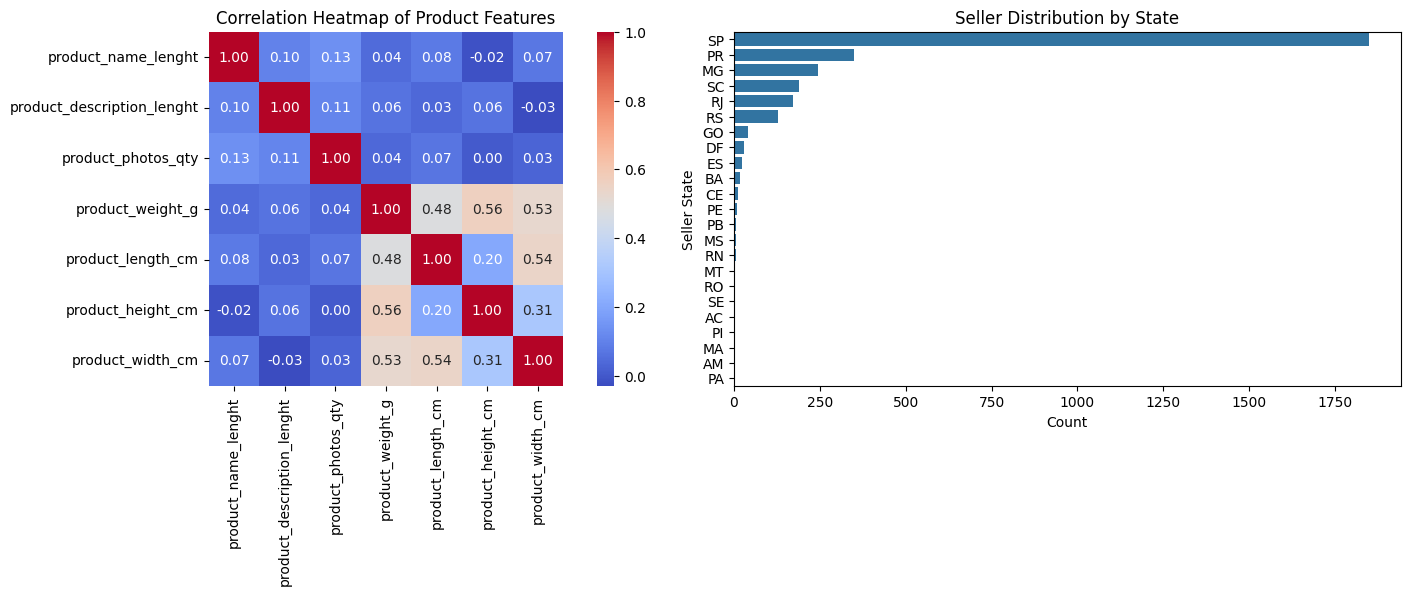

In [ ]:

dataframes = {}
for filename in os.listdir(datasets_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(datasets_path, filename)
        df = pd.read_csv(file_path, encoding='latin-1')
        dataframes[filename] = df

        if filename == 'olist_products_dataset.csv':
          numerical_df = dataframes[filename].select_dtypes(include=['number'])
          correlation_matrix = numerical_df.corr()

        elif filename == 'olist_sellers_dataset.csv':
          pass  # Placeholder for the second chart data

# Create a figure and two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Adjust figsize as needed

# Plot the correlation heatmap on the first subplot (axes[0])
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, ax=axes[0])
axes[0].set_title('Correlation Heatmap of Product Features')

# Plot the seller distribution on the second subplot (axes[1])
sns.countplot(data=dataframes['olist_sellers_dataset.csv'], y='seller_state',
              order=dataframes['olist_sellers_dataset.csv']['seller_state'].value_counts().index,
              ax=axes[1])
axes[1].set_title('Seller Distribution by State')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Seller State')

# Adjust layout and display the plots
plt.tight_layout()  # To prevent overlapping of subplots
plt.show()

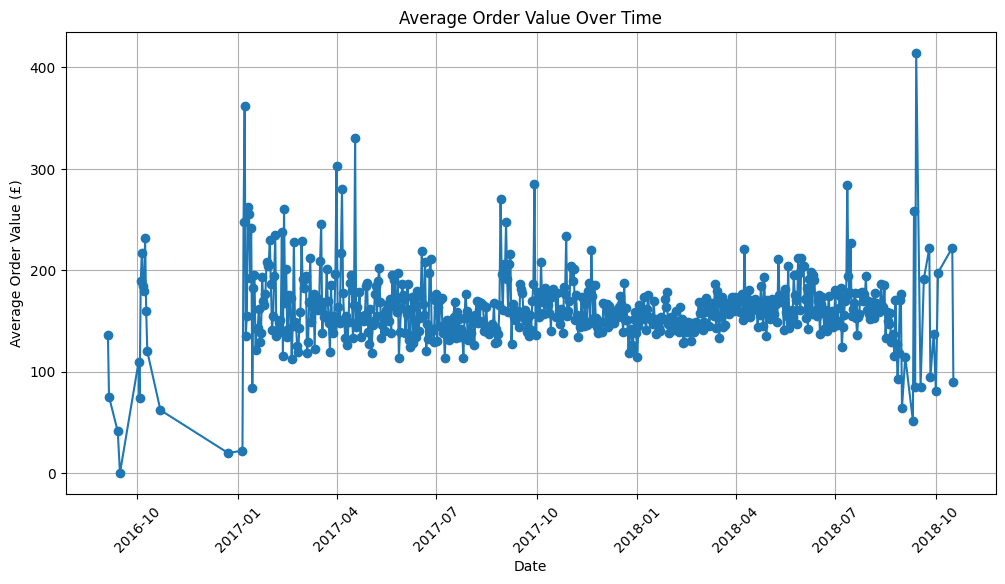

In [ ]:


datasets_path = '/content/drive/MyDrive/olist_data' # Define the path to your datasets

# Load datasets using the correct path
orders_df = pd.read_csv(os.path.join(datasets_path, 'olist_orders_dataset.csv')) # Use os.path.join to create the full file path
payments_df = pd.read_csv(os.path.join(datasets_path, 'olist_order_payments_dataset.csv')) # Use os.path.join to create the full file path

# Convert timestamps to datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# Aggregate total payment per order (some orders may have multiple payments)
order_payments = payments_df.groupby('order_id', as_index=False)['payment_value'].sum()

# Merge orders with aggregated payment data
orders_payments_df = orders_df.merge(order_payments, on="order_id", how="left")

# Aggregate total revenue and order count per day
revenue_orders_over_time = orders_payments_df.groupby(orders_payments_df['order_purchase_timestamp'].dt.date).agg(
    total_revenue=('payment_value', 'sum'),  # Total revenue per day
    total_orders=('order_id', 'count')       # Total orders per day
)

# Calculate Average Order Value (AOV) per day
revenue_orders_over_time['average_order_value'] = revenue_orders_over_time['total_revenue'] / revenue_orders_over_time['total_orders']

# Remove outliers (Optional: If some days have extreme values)
revenue_orders_over_time = revenue_orders_over_time[revenue_orders_over_time['average_order_value'] < 500]

# Plot AOV over time
plt.figure(figsize=(12, 6))
plt.plot(revenue_orders_over_time.index, revenue_orders_over_time['average_order_value'], marker='o', linestyle='-')

# Formatting the chart
plt.xlabel('Date')
plt.ylabel('Average Order Value (£)')
plt.title('Average Order Value Over Time')
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.show()

**1.2  Summary of the data and Missing Values**

This code performs data summarization and cleaning of the Olist dataset for Task 1.2 by loading CSV files from a specified path (datasets_path) into a dictionary of dataframes (dataframes). It reads the CSV files using the latin-1 encoding (if utf-8 fails) and then checks for missing values, displaying the count if any are found. It summarizes each dataset using describe() to give an overview of statistical properties (like mean, min, max, etc.) for all columns. If a column name contains 'date' or 'time', it tries to convert it to a datetime format. Categorical columns are identified and listed, while numerical columns are checked for minimum and maximum values to detect potential scaling issues. The code also drops duplicate rows and checks for invalid values like negative numbers in numeric fields. A function remove_outliers_iqr() is defined to remove outliers based on the Interquartile Range (IQR) method for numerical columns.

In [ ]:

datasets_path = '/content/drive/MyDrive/olist_data'


def remove_outliers_iqr(df, numerical_cols):
          for col in numerical_cols:
              Q1 = df[col].quantile(0.25)
              Q3 = df[col].quantile(0.75)
              IQR = Q3 - Q1
              lower_bound = Q1 - 1.5 * IQR
              upper_bound = Q3 + 1.5 * IQR

              # Remove outliers
              initial_shape = df.shape
              df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
              if df.shape != initial_shape:
                  print(f'Removed outliers from {col} using IQR method in {filename}.')

          return df

# Create an empty dictionary to store the dataframes
dataframes = {}
for filename in os.listdir(datasets_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(datasets_path, filename)

        # Read the CSV file into a pandas DataFrame, specifying the encoding
        # Try 'latin-1' or 'ISO-8859-1' if 'utf-8' doesn't work
        df = pd.read_csv(file_path, encoding='latin-1')

        # Store the dataframe in the dictionary
        dataframes[filename] = df

        # Check for missing values
        missing_values = df.isnull().sum().sum()
        if missing_values > 0:
            print(f'{filename} has {missing_values} missing values.')
        else:
            print(f'{filename} has no missing values.')

        # Summarize the data
        print(f'\nSummary of {filename}:')
        display(df.describe(include='all'))

        # Check for timestamp data type and convert if necessary
        for col in df.columns:
            if 'date' in col.lower() or 'time' in col.lower():
                try:
                    df[col] = pd.to_datetime(df[col])
                    print(f'Converted {col} to datetime in {filename}.')
                except Exception as e:
                    print(f'Failed to convert {col} in {filename}. Error: {e}')

        # Check for categorical data
        categorical_cols = df.select_dtypes(include='object').columns.tolist()
        if categorical_cols:
            print(f'Categorical columns in {filename}: {categorical_cols}')

        # Plotting distribution of numerical features
        numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()


        # Check if feature scaling is needed
        if numerical_cols:
            for col in numerical_cols:
                min_val = df[col].min()
                max_val = df[col].max()
                print(f'{col} in {filename} has min: {min_val}, max: {max_val}')

        # Additional pre-processing steps
        # Dropping duplicates
        initial_shape = df.shape
        df.drop_duplicates(inplace=True)
        if df.shape != initial_shape:
            print(f'Dropped duplicates in {filename}.')

        # Checking for noise (e.g., negative values where not expected)
        for col in numerical_cols:
            if (df[col] < 0).any():
                print(f'Noise detected: Negative values in {col} of {filename}.')


        for filename, df in dataframes.items():
            numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
            df = remove_outliers_iqr(df, numerical_cols)
            dataframes[filename] = df


olist_customers_dataset.csv has no missing values.

Summary of olist_customers_dataset.csv:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Categorical columns in olist_customers_dataset.csv: ['customer_id', 'customer_unique_id', 'customer_city', 'customer_state']
customer_zip_code_prefix in olist_customers_dataset.csv has min: 1003, max: 99990
olist_geolocation_dataset.csv has no missing values.

Summary of olist_geolocation_dataset.csv:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


Categorical columns in olist_geolocation_dataset.csv: ['geolocation_city', 'geolocation_state']
geolocation_zip_code_prefix in olist_geolocation_dataset.csv has min: 1001, max: 99990
geolocation_lat in olist_geolocation_dataset.csv has min: -36.6053744107061, max: 45.06593318269697
geolocation_lng in olist_geolocation_dataset.csv has min: -101.46676644931476, max: 121.10539381057764
Dropped duplicates in olist_geolocation_dataset.csv.
Noise detected: Negative values in geolocation_lat of olist_geolocation_dataset.csv.
Noise detected: Negative values in geolocation_lng of olist_geolocation_dataset.csv.
Removed outliers from geolocation_lat using IQR method in olist_geolocation_dataset.csv.
Removed outliers from geolocation_lng using IQR method in olist_geolocation_dataset.csv.
olist_order_payments_dataset.csv has no missing values.

Summary of olist_order_payments_dataset.csv:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


Categorical columns in olist_order_payments_dataset.csv: ['order_id', 'payment_type']
payment_sequential in olist_order_payments_dataset.csv has min: 1, max: 29
payment_installments in olist_order_payments_dataset.csv has min: 0, max: 24
payment_value in olist_order_payments_dataset.csv has min: 0.0, max: 13664.08
Removed outliers from geolocation_zip_code_prefix using IQR method in olist_geolocation_dataset.csv.
Removed outliers from geolocation_lat using IQR method in olist_geolocation_dataset.csv.
Removed outliers from geolocation_lng using IQR method in olist_geolocation_dataset.csv.
Removed outliers from payment_sequential using IQR method in olist_order_payments_dataset.csv.
Removed outliers from payment_installments using IQR method in olist_order_payments_dataset.csv.
Removed outliers from payment_value using IQR method in olist_order_payments_dataset.csv.
olist_order_items_dataset.csv has no missing values.

Summary of olist_order_items_dataset.csv:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


Converted shipping_limit_date to datetime in olist_order_items_dataset.csv.
Categorical columns in olist_order_items_dataset.csv: ['order_id', 'product_id', 'seller_id']
order_item_id in olist_order_items_dataset.csv has min: 1, max: 21
price in olist_order_items_dataset.csv has min: 0.85, max: 6735.0
freight_value in olist_order_items_dataset.csv has min: 0.0, max: 409.68
Removed outliers from geolocation_zip_code_prefix using IQR method in olist_geolocation_dataset.csv.
Removed outliers from geolocation_lat using IQR method in olist_geolocation_dataset.csv.
Removed outliers from geolocation_lng using IQR method in olist_geolocation_dataset.csv.
Removed outliers from payment_installments using IQR method in olist_order_payments_dataset.csv.
Removed outliers from payment_value using IQR method in olist_order_payments_dataset.csv.
Removed outliers from order_item_id using IQR method in olist_order_items_dataset.csv.
Removed outliers from price using IQR method in olist_order_items_datas

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Converted order_purchase_timestamp to datetime in olist_orders_dataset.csv.
Converted order_delivered_carrier_date to datetime in olist_orders_dataset.csv.
Converted order_delivered_customer_date to datetime in olist_orders_dataset.csv.
Converted order_estimated_delivery_date to datetime in olist_orders_dataset.csv.
Categorical columns in olist_orders_dataset.csv: ['order_id', 'customer_id', 'order_status', 'order_approved_at']
Removed outliers from geolocation_lat using IQR method in olist_geolocation_dataset.csv.
Removed outliers from geolocation_lng using IQR method in olist_geolocation_dataset.csv.
Removed outliers from payment_value using IQR method in olist_order_payments_dataset.csv.
Removed outliers from price using IQR method in olist_order_items_dataset.csv.
Removed outliers from freight_value using IQR method in olist_order_items_dataset.csv.
olist_products_dataset.csv has 2448 missing values.

Summary of olist_products_dataset.csv:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


Categorical columns in olist_products_dataset.csv: ['product_id', 'product_category_name']
product_name_lenght in olist_products_dataset.csv has min: 5.0, max: 76.0
product_description_lenght in olist_products_dataset.csv has min: 4.0, max: 3992.0
product_photos_qty in olist_products_dataset.csv has min: 1.0, max: 20.0
product_weight_g in olist_products_dataset.csv has min: 0.0, max: 40425.0
product_length_cm in olist_products_dataset.csv has min: 7.0, max: 105.0
product_height_cm in olist_products_dataset.csv has min: 2.0, max: 105.0
product_width_cm in olist_products_dataset.csv has min: 6.0, max: 118.0
Removed outliers from geolocation_lat using IQR method in olist_geolocation_dataset.csv.
Removed outliers from payment_value using IQR method in olist_order_payments_dataset.csv.
Removed outliers from price using IQR method in olist_order_items_dataset.csv.
Removed outliers from freight_value using IQR method in olist_order_items_dataset.csv.
Removed outliers from product_name_lenght 

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


Categorical columns in olist_sellers_dataset.csv: ['seller_id', 'seller_city', 'seller_state']
seller_zip_code_prefix in olist_sellers_dataset.csv has min: 1001, max: 99730
Removed outliers from geolocation_lat using IQR method in olist_geolocation_dataset.csv.
Removed outliers from payment_value using IQR method in olist_order_payments_dataset.csv.
Removed outliers from price using IQR method in olist_order_items_dataset.csv.
Removed outliers from product_name_lenght using IQR method in olist_products_dataset.csv.
Removed outliers from product_description_lenght using IQR method in olist_products_dataset.csv.
Removed outliers from product_weight_g using IQR method in olist_products_dataset.csv.
Removed outliers from product_length_cm using IQR method in olist_products_dataset.csv.
Removed outliers from product_height_cm using IQR method in olist_products_dataset.csv.
Removed outliers from product_width_cm using IQR method in olist_products_dataset.csv.
product_category_name_translatio

,ï»¿product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Categorical columns in product_category_name_translation.csv: ['ï»¿product_category_name', 'product_category_name_english']
Removed outliers from geolocation_lat using IQR method in olist_geolocation_dataset.csv.
Removed outliers from payment_value using IQR method in olist_order_payments_dataset.csv.
Removed outliers from price using IQR method in olist_order_items_dataset.csv.
Removed outliers from product_description_lenght using IQR method in olist_products_dataset.csv.
Removed outliers from product_weight_g using IQR method in olist_products_dataset.csv.
Removed outliers from product_length_cm using IQR method in olist_products_dataset.csv.
Removed outliers from product_width_cm using IQR method in olist_products_dataset.csv.
olist_order_reviews_dataset.csv has 146542 missing values.

Summary of olist_order_reviews_dataset.csv:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,100000,100000,100000.000000,11715,41743,100000,100000
unique,99173,99441,NaN,4588,36046,637,89500
top,e44840754f12fad2b8646712121b349a,df56136b8031ecd28e200bb18e6ddb2e,NaN,Recomendo,Good,19/12/2017 00:00,12/08/2017 14:35
freq,3,3,NaN,426,375,466,6
mean,NaN,NaN,4.070890,NaN,NaN,NaN,NaN
std,NaN,NaN,1.359663,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


<ipython-input-6-42fc89b03544>:48: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col])
<ipython-input-6-42fc89b03544>:48: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col])


Converted review_creation_date to datetime in olist_order_reviews_dataset.csv.
Converted review_answer_timestamp to datetime in olist_order_reviews_dataset.csv.
Categorical columns in olist_order_reviews_dataset.csv: ['review_id', 'order_id', 'review_comment_title', 'review_comment_message']
review_score in olist_order_reviews_dataset.csv has min: 1, max: 5
Removed outliers from geolocation_lat using IQR method in olist_geolocation_dataset.csv.
Removed outliers from price using IQR method in olist_order_items_dataset.csv.
Removed outliers from product_description_lenght using IQR method in olist_products_dataset.csv.
Removed outliers from product_weight_g using IQR method in olist_products_dataset.csv.
Removed outliers from product_length_cm using IQR method in olist_products_dataset.csv.
Removed outliers from product_height_cm using IQR method in olist_products_dataset.csv.
Removed outliers from review_score using IQR method in olist_order_reviews_dataset.csv.


**1.3 Timestamp Data**

The goal of this code is to load all CSV files from the specified datasets_path directory into a dictionary of Pandas dataframes, where the filename serves as the key. It reads the files with latin-1 encoding to properly handle any special characters. Once the data is loaded, the code iterates through each dataframe and its columns to identify columns that contain the word "timestamp" (case-insensitive). If such columns are found, the code uses the display() function with HTML styling to output the filename and column name in blue-colored text. This allows for quick identification and visualization of any timestamp columns across multiple datasets, helping users efficiently locate and analyze time-related data.

In [ ]:
datasets_path = '/content/drive/MyDrive/olist_data'
dataframes = {}
for filename in os.listdir(datasets_path):
  if filename.endswith('.csv'):
    file_path = os.path.join(datasets_path, filename)
    df = pd.read_csv(file_path, encoding='latin-1')
    dataframes[filename] = df


for filename, df in dataframes.items():
       for column in df.columns:
           if 'timestamp' in column.lower():
               # Apply HTML styling for blue text
               display(HTML(f"<span style='color:blue;'>{filename}: {column}</span>"))

# Task 2 Customer Segmentation

**Segment 1 - Least Satisified Customers**

To derive this segment, we derived the percentage of frequency that each score 1 - 5 has in the 'review' column. After score 5, the amount of scores with 1s or 2s make up the 2nd and 3rd most amounts of scores with 19% and 11%  highlighting a significant amount of dissatisfied customers.

Based on these customers, we should proactively address their satisfaction levels by implementing retention strategies, such as offering small discounts or exclusive perks. This will help enhance their loyalty and reduce the likelihood of them switching to a competitor.

Among the dissatisfied, we have identified the recurring customers who still frequently buy the products represented in the variable 'low_r_customer_ids', they should be given more discounts than the others because they make up the segment of loyal customers too and if it’s not in the budget only them should be offered the discounts.

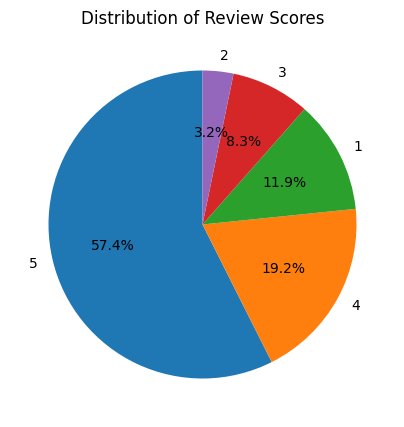

['eecafc3ff695f031bfe354a9fff9d437', 'db13a417a95ad304e9674468c17ade85', 'e545e697bb9d1b81e0a702121d4e94d5', '5bb8de60ca2ca8b01a5ce471802fe10b', '30e6e854c81fa16f46a5d7f3ab025e6f', 'c17d38e818f10c91ebcd036bc835a648', '2438ba50f3a77cbfd3377900835fb526', '29a48e3e901b5187dae9af8a5563c795', '8c99550966de67486c939c2337338326', '5458c93e0db88f9b885bc7dbc3bfa2a3', '9a4a662f2adad6ed0a31fd0d4221e1cc', '5fe0562353e8f0b6c0c6b55cd0f58fe0', 'a08a7edd638cbf99e97e2ed2d19483be', 'd3286ca43aa21423c6045b2806ca8e56', '35a436968e81c497c7f713bac80c42d0', '2e7caf02d3f51fe071a2444d36ea2d51', 'a44a4a6e7b2c7cc8ae47bcc8bdb3cdd5', '8cc5b669b36635162d2d3261b8559d6a', '3068255d75f415c21b115399dc51f7ea', '9fa9fdb373ab71b7d9081e43795accd2', 'df0f79495c6708eb945df0f91d5eada1', 'de3488839c20b6109821b6a1af9818df', 'ced5464be4716dddff6e88ccf5e0261a', '49fbaec7f8c365d12595c7b6cb6db285', '0e453162f1e34646ff631c2379109bea', '54ef4ab32481f5109378c975bbe5faa9', '3b9375de9837ce03b6516b3a343ad6be', '6225eed02b7d1a110b6e5b5dd4

In [ ]:
datasets_path = '/content/drive/MyDrive/olist_data'

dataframes = {}

# Loop through the files in the datasets_path
for filename in os.listdir(datasets_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(datasets_path, filename)

        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path, encoding='latin-1')

        # Store the DataFrame in the dictionary using the filename as the key
        dataframes[filename] = df

df1 = dataframes['olist_order_reviews_dataset.csv']
df2 = dataframes['olist_orders_dataset.csv']
df3 = df1['review_score']
df4 = df2['order_id']

# Calculate the counts of each review score
score_counts = df1['review_score'].value_counts()

# Calculate the percentages of each score
score_percentages = (score_counts / score_counts.sum()) * 100

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(score_percentages, labels=score_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Review Scores')
plt.show()

# Filter df1 for review scores 1 and 2 to create filtered_df1
filtered_df1 = df1[df1['review_score'].isin([1, 2])]

# Extract the order_id from the filtered DataFrame
low_rating_order_ids = filtered_df1['order_id'].tolist()

# Merge filtered_df1 with df2 to get customer_id
low_r_customer = pd.merge(filtered_df1[['order_id']], df2[['order_id', 'customer_id']], on='order_id', how='left')

# Get the unique customer IDs
low_r_customer_ids = low_r_customer['customer_id'].unique().tolist()

# Print or use low_r_customer_ids
print(low_r_customer_ids)
number_of_1s_or2s=len(low_r_customer_ids)
print(number_of_1s_or2s)
print(score_counts)

**Segment 2 - Best Customers (By value of orders)**

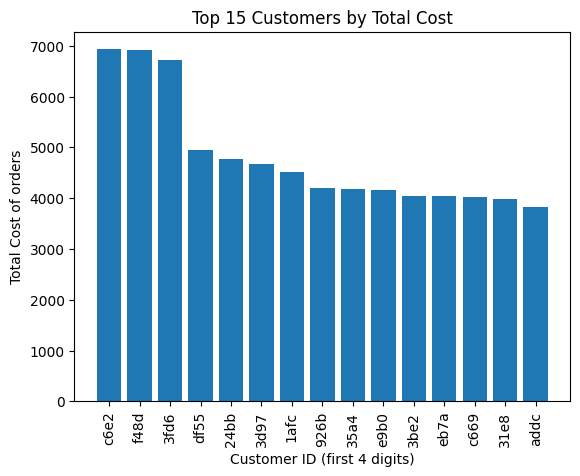

In [ ]:
order_items = dataframes['olist_order_items_dataset.csv']
orders = dataframes['olist_orders_dataset.csv']  # Needed for linking 'order_id' to 'customer_id'
customers = dataframes['olist_customers_dataset.csv']

# Ensure 'price' and 'freight_value' are numeric
order_items['price'] = order_items['price'].astype(float)
order_items['freight_value'] = order_items['freight_value'].astype(float)

# Calculate total cost
order_items['total_cost'] = order_items['price'] + order_items['freight_value']

# Sort by 'total_cost' in descending order
n_sorted = order_items.sort_values(by=['total_cost'], ascending=False)

# Merge 'order_items' with 'orders' to get 'customer_id'
merged_orders = pd.merge(n_sorted, orders[['order_id', 'customer_id']], on="order_id", how="left")

# Merge with 'customers' dataset to add 'customer_id' details
final_data = pd.merge(merged_orders, customers, on="customer_id", how="left")


plt.bar(final_data['customer_id'].head(15), final_data['total_cost'].head(15))
plt.xlabel('Customer ID (first 4 digits)')
plt.ylabel('Total Cost of orders')
plt.title('Top 15 Customers by Total Cost')
plt.xticks(plt.xticks()[0], [str(tick)[:4] for tick in final_data['customer_id'].head(15)], rotation=90)

plt.show()

**Customer Segementation by Location**

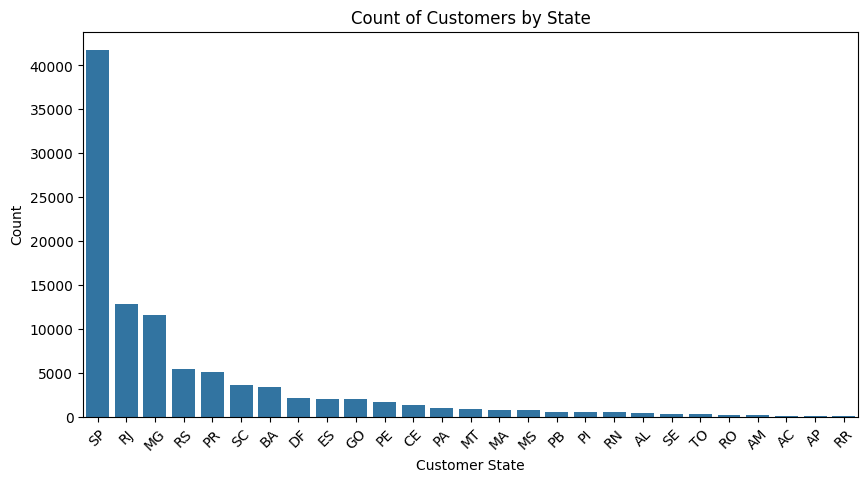

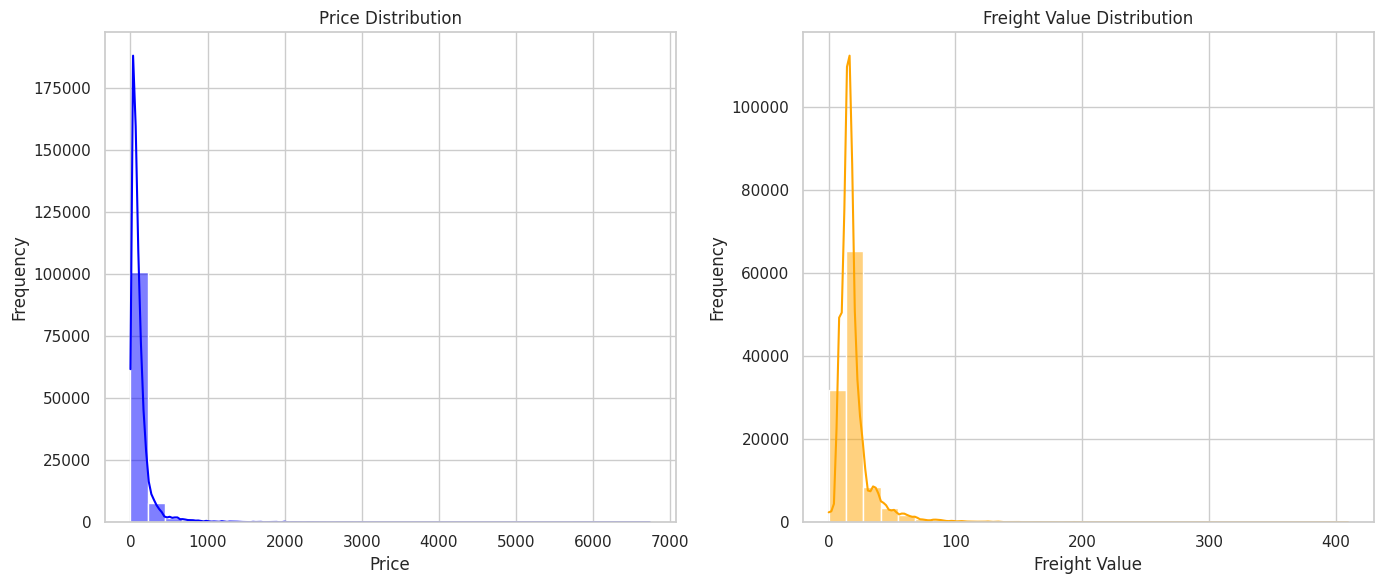

In [ ]:
datasets_path = '/content/drive/MyDrive/olist_data'

# Create an empty dictionary to store the dataframes
dataframes = {}
for filename in os.listdir(datasets_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(datasets_path, filename)

        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path, encoding='latin-1')

        # Store the dataframe in the dictionary
        dataframes[filename] = df

        # Plotting based on the dataset - INDENTED INSIDE THE LOOP
        if filename == 'olist_customers_dataset.csv':
            # Bar chart for customer count by state
            plt.figure(figsize=(10, 5))
            sns.countplot(data=df, x='customer_state', order=df['customer_state'].value_counts().index)
            plt.title('Count of Customers by State')
            plt.xlabel('Customer State')
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.show()
        elif filename == 'olist_geolocation_dataset.csv':
            state_counts = dataframes[filename]['geolocation_state'].value_counts().reset_index()
            state_counts.columns = ['state', 'count']

            # URL to a GeoJSON file for Brazilian states
            brazil_geojson_url = (
                "https://raw.githubusercontent.com/codeforamerica/click_that_hood/"
                "master/public/data/brazil-states.geojson"
            )

            # Create the Choropleth Map
            fig = px.choropleth(
                state_counts,
                geojson=brazil_geojson_url,
                locations='state',  # State abbreviations (e.g., "SP")
                featureidkey='properties.sigla',  # Key in GeoJSON matching state abbreviations
                color='count',  # Values to color
                color_continuous_scale='Blues',
                scope='south america',  # Focus on Brazil
                labels={'count': 'Number of Zip Codes'},
                title='Geolocation Density by Brazilian State'
            )

            # Adjust map layout
            fig.update_geos(showcountries=False, showcoastlines=False, showland=False, fitbounds="locations")
            fig.update_layout(margin={"r": 0, "t": 40, "l": 0, "b": 0})
            fig.show()

        elif filename == 'olist_order_items_dataset.csv':
            # Box plot for price distribution
            # plt.figure(figsize=(10, 5))
            # sns.boxplot(x=df['price'])
            # plt.title('Box Plot of Prices')
            # plt.xlabel('Price')
            # plt.grid()
            # plt.show()

            sns.set(style="whitegrid")
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))
            # Histogram for Price
            sns.histplot(dataframes[filename]['price'], bins=30, kde=True, ax=axes[0], color='blue')
            axes[0].set_title('Price Distribution')
            axes[0].set_xlabel('Price')
            axes[0].set_ylabel('Frequency')
            # Histogram for Freight Value
            sns.histplot(dataframes[filename]['freight_value'], bins=30, kde=True, ax=axes[1], color='orange')
            axes[1].set_title('Freight Value Distribution')
            axes[1].set_xlabel('Freight Value')
            axes[1].set_ylabel('Frequency')

            plt.tight_layout()
            plt.show()

Repeat Customers: 2997
One-Time Customers: 93099


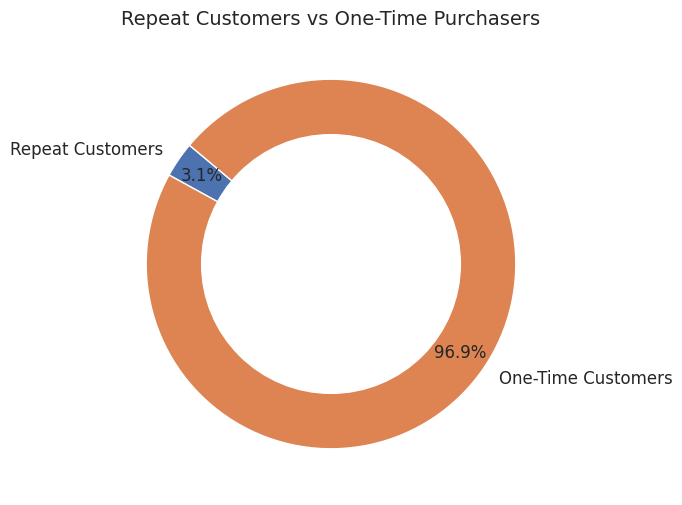

In [ ]:

datasets_path = '/content/drive/MyDrive/olist_data' # Define your datasets path

# Load datasets using the correct path
customers_df = pd.read_csv(os.path.join(datasets_path, 'olist_customers_dataset.csv')) # Use os.path.join to create the full file path
orders_df = pd.read_csv(os.path.join(datasets_path, 'olist_orders_dataset.csv')) # Use os.path.join to create the full file path


# Merge datasets to link customers with orders
customer_orders_df = orders_df.merge(customers_df, on="customer_id", how="left")

# Count the number of purchases per customer
customer_order_counts = customer_orders_df['customer_unique_id'].value_counts()

# Categorize customers
repeat_customers_count = (customer_order_counts > 1).sum()
one_time_customers_count = (customer_order_counts == 1).sum()

# Print results
print(f"Repeat Customers: {repeat_customers_count}")
print(f"One-Time Customers: {one_time_customers_count}")

# Create a donut chart for repeat vs. one-time customers
fig, ax = plt.subplots(figsize=(6, 6))
sizes = [repeat_customers_count, one_time_customers_count]
labels = ['Repeat Customers', 'One-Time Customers']

# Create the pie chart with a donut effect
wedges, texts, autotexts = ax.pie(
    sizes, labels=labels, autopct='%1.1f%%', startangle=140,
    wedgeprops=dict(width=0.4, edgecolor='w'), pctdistance=0.85
)

# Format the text
for text in texts + autotexts:
    text.set_fontsize(12)

# Add a circle in the center to create a donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add title
plt.title('Repeat Customers vs One-Time Purchasers', fontsize=14)

# Display the chart
plt.show()



In [ ]:
from datetime import datetime

# Define today's date (assuming dataset is outdated)
today = datetime(2018, 12, 31)  # Adjust if needed

# Calculate days since last order
customer_behavior['days_since_last_order'] = (today - customer_behavior['last_order']).dt.days

# Define segmentation based on recency
customer_behavior['customer_segment'] = 'Inactive Buyer'
customer_behavior.loc[customer_behavior['days_since_last_order'] <= 180, 'customer_segment'] = 'Dormant Buyer'
customer_behavior.loc[customer_behavior['days_since_last_order'] <= 90, 'customer_segment'] = 'Recent Buyer'

# Count customer segments
customer_segment_counts = customer_behavior['customer_segment'].value_counts()

# Create Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(customer_segment_counts, labels=customer_segment_counts.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Customer Recency Segmentation')
plt.show()

# Display results
from google.colab import data_table
data_table.DataTable(customer_behavior)



NameError: name 'customer_behavior' is not defined

Average Order Value of Customers - Low AOV < £50, Medium AOV £50 - £150, High AOV > £150

In [ ]:
# Calculate Average Order Value (AOV)
customer_behavior['average_order_value'] = customer_behavior['total_spent'] / customer_behavior['total_orders']

# Define segmentation based on spending
customer_behavior['customer_segment'] = 'Low AOV'
customer_behavior.loc[customer_behavior['average_order_value'] > 50, 'customer_segment'] = 'Medium AOV'
customer_behavior.loc[customer_behavior['average_order_value'] > 150, 'customer_segment'] = 'High AOV'

# Count customer segments
customer_segment_counts = customer_behavior['customer_segment'].value_counts()

# Create Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(customer_segment_counts, labels=customer_segment_counts.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Customer Segmentation by Average Order Value')
plt.show()

# Display results
data_table.DataTable(customer_behavior)


In [ ]:
# Define spending percentiles
high_spender_threshold = customer_behavior['total_spent'].quantile(0.75)
low_spender_threshold = customer_behavior['total_spent'].quantile(0.25)

# Segment customers
customer_behavior['customer_segment'] = 'Mid-Spender'
customer_behavior.loc[customer_behavior['total_spent'] >= high_spender_threshold, 'customer_segment'] = 'Big Spender'
customer_behavior.loc[customer_behavior['total_spent'] <= low_spender_threshold, 'customer_segment'] = 'Budget Buyer'

# Count customer segments
customer_segment_counts = customer_behavior['customer_segment'].value_counts()

# Create Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(customer_segment_counts, labels=customer_segment_counts.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Customer Spending Segmentation')
plt.show()

# Display results
from google.colab import data_table
data_table.DataTable(customer_behavior)


**Segment 4 - Product Categories**

In [ ]:
import os
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Set the folder path
folder_path = '/content/drive/MyDrive/olist_data'

# List all CSV files in the folder
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Load each CSV file into a dictionary of DataFrames
dataframes = {}
for file in files:
    file_path = os.path.join(folder_path, file)
    df_name = file.split('.')[0]  # Use filename (without .csv) as the key
    dataframes[df_name] = pd.read_csv(file_path, encoding='latin-1')

order_items = dataframes['olist_order_items_dataset']
products = dataframes['olist_products_dataset']
category_translation = dataframes['product_category_name_translation']
orders = dataframes['olist_orders_dataset']
customers = dataframes['olist_customers_dataset']

# Merge product data with category translation
products = products.merge(category_translation, left_on='product_category_name', right_on='ï»¿product_category_name', how='left')
products = products.drop(columns=['ï»¿product_category_name'])
# Merge with order items to get order-level data
order_data = order_items.merge(products, on='product_id', how='left')

# Calculate total spending per category
category_spending = order_data.groupby('product_category_name_english')['price'].sum().reset_index()
category_spending = category_spending.sort_values(by='price', ascending=False)

# Average order value per category
category_avg_order = order_data.groupby('product_category_name_english')['price'].mean().reset_index()
category_avg_order = category_avg_order.sort_values(by='price', ascending=False)

# Visualisations
#### Total Spending by Category - Identify which categories generate the most revenue.####
plt.figure(figsize=(12, 6))
sns.barplot(x='price', y='product_category_name_english', hue='product_category_name_english', data=category_spending.head(10), palette='viridis', legend=False)
plt.title('Top 10 Categories by Total Spending')
plt.xlabel('Total Spending')
plt.ylabel('Product Category')
plt.show()

#### Average Order Value by Category - See which categories have the highest average spending.####
plt.figure(figsize=(12, 6))
sns.barplot(x='price', y='product_category_name_english', hue='product_category_name_english',data=category_avg_order.head(10), palette='magma', legend=False)
plt.title('Top 10 Categories by Average Order Value')
plt.xlabel('Average Order Value')
plt.ylabel('Product Category')
plt.show()


##### Cross-Category Buying Patterns  - To analyze if certain categories are more popular in specific regions or cities.#####


# Link with order and customer data to get location details
order_data = order_data.merge(orders[['order_id', 'customer_id']], on='order_id', how='left')
order_data = order_data.merge(customers[['customer_id', 'customer_city', 'customer_state']], on='customer_id', how='left')


# Group by category and state to calculate total spending per state
category_state_spending = order_data.groupby(['product_category_name_english', 'customer_state'])['price'].sum().reset_index()

# Get top 10 states with the highest spending
top_states = category_state_spending.groupby('customer_state')['price'].sum().sort_values(ascending=False).head(10).index

# Filter for top states only
top_state_data = category_state_spending[category_state_spending['customer_state'].isin(top_states)]

# Get top 5 product categories in these states
top_categories = top_state_data.groupby('product_category_name_english')['price'].sum().sort_values(ascending=False).head(5).index
top_state_category_data = top_state_data[top_state_data['product_category_name_english'].isin(top_categories)]

# Plotting
plt.figure(figsize=(15, 10))
sns.barplot(x='price', y='product_category_name_english', hue='customer_state', data=top_state_category_data, palette='Spectral')
plt.title('Top 5 Product Categories in Top 10 States')
plt.xlabel('Total Spending')
plt.ylabel('Product Category')
plt.legend(title='State')
plt.show()

**Segment 5 - Geographical and Demographic Insights**

In [ ]:


# Set the folder path
folder_path = '/content/drive/MyDrive/olist_data'

# List all CSV files in the folder
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Load each CSV file into a dictionary of DataFrames
dataframes = {}
for file in files:
    file_path = os.path.join(folder_path, file)
    df_name = file.split('.')[0]  # Use filename (without .csv) as the key
    dataframes[df_name] = pd.read_csv(file_path, encoding='latin-1')

orders_df = dataframes['olist_orders_dataset']
reviews_df = dataframes['olist_order_reviews_dataset']

date_columns = ['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in date_columns:
    orders_df[col] = pd.to_datetime(orders_df[col])


orders_df['actual_delivery_time'] = (orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']).dt.days
orders_df['estimated_delivery_time'] = (orders_df['order_estimated_delivery_date'] - orders_df['order_purchase_timestamp']).dt.days
orders_df['delivery_delay'] = (orders_df['order_delivered_customer_date'] - orders_df['order_estimated_delivery_date']).dt.days

orders_reviews_df = pd.merge(orders_df, reviews_df[['order_id', 'review_score']], on='order_id', how='inner')


review_delivery_analysis = orders_reviews_df.groupby('review_score').agg(
    avg_actual_delivery=('actual_delivery_time', 'mean'),
    avg_estimated_delivery=('estimated_delivery_time', 'mean'),
    avg_delivery_delay=('delivery_delay', 'mean')
).reset_index()


# Plot Delivery Delays Distribution
plt.figure(figsize=(10, 6))
sns.histplot(orders_df['delivery_delay'], bins=30, kde=True, color='blue')
plt.axvline(0, color='red', linestyle='dashed', label='On-time delivery')
plt.title('Distribution of Delivery Delays')
plt.xlabel('Delivery Delay (days)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot Average Delivery Time by Review Score
plt.figure(figsize=(10, 6))
sns.barplot(x='review_score', y='avg_actual_delivery', data=review_delivery_analysis, palette='coolwarm')
plt.title('Impact of Delivery Time on Customer Satisfaction')
plt.xlabel('Review Score')
plt.ylabel('Average Actual Delivery Time (days)')
plt.show()

# Scatter plot for Delivery Delay vs. Review Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='review_score', y='delivery_delay', data=orders_reviews_df,
            hue='review_score', palette='coolwarm', legend=False)
plt.title('Delivery Delays vs. Customer Satisfaction')
plt.xlabel('Review Score')
plt.ylabel('Delivery Delay (days)')
plt.show()

# Task 3 Recommender System

The main strategy will be content-based filtering. First, we will retrieve the customer's purchasing history and identify products they have rated 4 stars or higher. Next, we will extract the order IDs associated with these high-rated reviews to determine the specific products purchased. From there, we will identify the product categories and recommend similar categories based on the customer's preferences.



In [ ]:
#3.1 Get the purchase history first
#Enter the customer who you want to see their recommendations for
example_customer=("f48d464a0baaea338cb25f816991ab1f")

folder_path = '/content/drive/MyDrive/olist_data'

# List all CSV files in the folder
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Load each CSV file into a dictionary of DataFrames
dataframes = {}
for file in files:
    file_path = os.path.join(folder_path, file)
    df_name = file.split('.')[0]  # Use filename (without .csv) as the key
    dataframes[df_name] = pd.read_csv(file_path, encoding='latin-1')

df1 = dataframes['olist_order_reviews_dataset']
df2 = dataframes['olist_orders_dataset']
df3 = dataframes['olist_order_items_dataset']
df4 = dataframes['olist_products_dataset']
df5 = dataframes['product_category_name_translation']
df6 = dataframes['olist_customers_dataset']
df7 = dataframes['olist_order_reviews_dataset']

# Merge the necessary dataframes
merged_df = df6.merge(df2, on='customer_id', how='inner')
merged_df = merged_df.merge(df3, on='order_id', how='inner')

# Filter for the example customer
customer_orders = merged_df[merged_df['customer_id'] == example_customer]


order_ids_list = []
if not customer_orders.empty:
  order_ids = customer_orders['order_id'].unique()
  print(f"Order IDs for customer {example_customer}:")
  for order_id in order_ids:
    order_ids_list.append(order_id)
    print(order_ids_list)
else:
  print(f"No orders found for customer {example_customer}")


#3.2 Factor in the Reviews
#Use the review score to either dampen the recommendation of the category of product or promote it

# ... (previous code to create order_ids_list) ...

review_scores = {}  # Dictionary to store order_id and review_score_category

for order_id in order_ids_list:
    # Filter df7 (reviews) for the current order_id
    review_for_order = df7[df7['order_id'] == order_id]

    # Check if a review exists for the order
    if not review_for_order.empty:
        review_score = review_for_order['review_score'].iloc[0]  # Get the review score

        # Store 0 or 1 based on review score
        if review_score < 3:
            review_scores[order_id] = 0  # Store 0 for negative review
        else:
            review_scores[order_id] = 1  # Store 1 for positive review
    else:
        review_scores[order_id] = -1 # Store -1 if no review found

# Print the review_scores dictionary
print(review_scores)
product_ids_for_orders = df3[df3['order_id'].isin(order_ids_list)]['product_id'].unique()

print("Product IDs associated with the orders:", product_ids_for_orders)
product_categories_for_orders = df4[df4['product_id'].isin(product_ids_for_orders)]['product_category_name'].unique()

# Print the product categories
print("Product categories associated with the orders:", product_categories_for_orders)

#3.3 Factor in Product Details
#Things like product dimension or price should be used to decide what to recommend to the user

# Merge product data with order items to include price
df4_with_price = df4.merge(df3[['product_id', 'price']], on='product_id', how='left')

# Recommend new products (same category, not previously bought)
recommended_products = df4_with_price[
    (df4_with_price['product_category_name'].isin(product_categories_for_orders)) |
    (df4_with_price['product_id'].isin(product_ids_for_orders))
]

# Sort recommendations by price similarity or highest reviews (if available)
recommended_products = recommended_products.sort_values(by='price', ascending=True).head(5)


# Ensure we don't sample more than available products
num_recommendations = min(5, len(recommended_products))

if num_recommendations > 0:
    top_recommendations = recommended_products.sample(num_recommendations)
    print("Recommended Products:")
    print(top_recommendations[['product_id', 'product_category_name', 'price']])
else:
    print("No new products found to recommend in the same category.")


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Step 1: Identify all future orders placed by the customer
if 'customer_id' in df2.columns and 'order_id' in df2.columns:
    customer_future_orders = df2[df2['customer_id'] == example_customer]['order_id'].unique()
else:
    print("Error: 'customer_id' or 'order_id' not found in orders dataset.")
    customer_future_orders = []

# Step 2: Find products in those future orders
if len(customer_future_orders) > 0 and 'order_id' in df3.columns and 'product_id' in df3.columns:
    future_orders = df3[df3['order_id'].isin(customer_future_orders)]['product_id'].unique()
else:
    print("⚠️ Warning: No future purchases found for this customer. Evaluation may be inaccurate.")
    future_orders = []

# Step 3: Verify recommended products have 'product_id'
if 'product_id' not in recommended_products.columns:
    print("Error: 'product_id' not found in recommended_products.")
else:
    # Step 4: Assign ground truth labels
    recommended_products = recommended_products.copy()  # Prevent SettingWithCopyWarning
    recommended_products['actual'] = recommended_products['product_id'].apply(lambda x: 1 if x in future_orders else 0)

    # Step 5: Extract true labels (ground truth) and predicted labels (recommendations)
    y_true = recommended_products['actual'].values  # Actual purchases (Ground Truth)
    y_pred = [1] * len(y_true)  # All recommended products are positive predictions

    # Step 6: Compute Metrics (only if we have valid data)
    if sum(y_true) > 0:  # Ensure we have at least one true positive case
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        auc = roc_auc_score(y_true, y_pred)

        # Step 7: Display Results
        print(f"\n📊 **Evaluation Metrics for Recommender System** 📊")
        print(f"✅ Precision: {precision:.2f}")
        print(f"✅ Recall: {recall:.2f}")
        print(f"✅ F1 Score: {f1:.2f}")
        print(f"✅ AUC Score: {auc:.2f}")
    else:
        print("\n⚠️ Not enough positive samples for evaluation. Precision, Recall, and AUC may not be meaningful.")


In [ ]:
# Step 1: Get all future purchases for each customer
future_orders_df = df2.merge(df3, on='order_id', how='left')[['customer_id', 'product_id']]

# Step 2: Convert to a dictionary {customer_id: [list of product_ids]}
customer_future_orders = future_orders_df.groupby('customer_id')['product_id'].apply(list).to_dict()

# Step 3: Evaluate for all customers at once
total_y_true = []
total_y_pred = []

for customer, future_products in customer_future_orders.items():
    recommended_products['actual'] = recommended_products['product_id'].apply(lambda x: 1 if x in future_products else 0)
    y_true = recommended_products['actual'].values
    y_pred = [1] * len(y_true)  # All recommended products are positive predictions

    total_y_true.extend(y_true)
    total_y_pred.extend(y_pred)

# Compute evaluation metrics
if sum(total_y_true) > 0:
    precision = precision_score(total_y_true, total_y_pred)
    recall = recall_score(total_y_true, total_y_pred)
    f1 = f1_score(total_y_true, total_y_pred)
    auc = roc_auc_score(total_y_true, total_y_pred)

    print("\n📊 **Overall Recommender System Evaluation** 📊")
    print(f"✅ Precision: {precision:.2f}")
    print(f"✅ Recall: {recall:.2f}")
    print(f"✅ F1 Score: {f1:.2f}")
    print(f"✅ AUC Score: {auc:.2f}")
else:
    print("\n⚠️ Not enough positive samples across all customers for evaluation.")


# Task 5 - Sentiment Analysis

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Sentiment Distribution (%):
sentiment
Positive    56.459766
Neutral     27.235704
Negative    16.304530
Name: proportion, dtype: float64


<ipython-input-34-d82dfa838c31>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Updatedreviews_df['sentiment'] = Updatedreviews_df['review_comment_message'].apply(classify_sentiment)


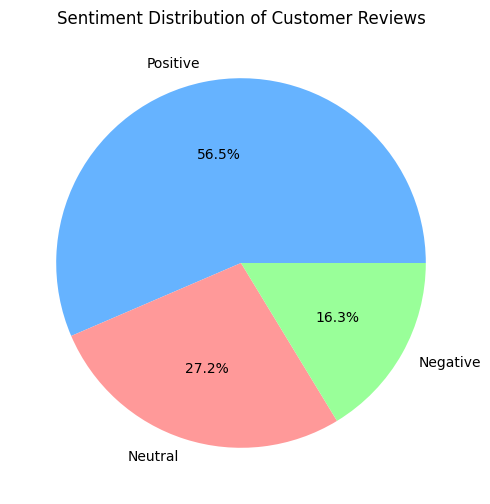

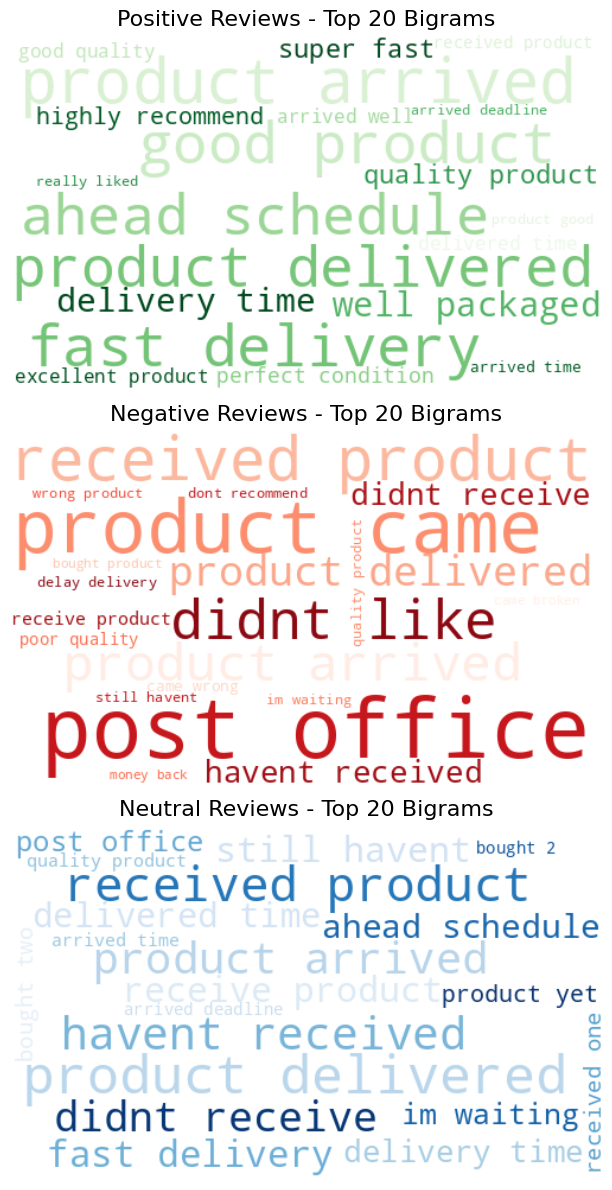

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
from wordcloud import WordCloud
import nltk
import os
import string

# Download required NLTK data
nltk.download('vader_lexicon')
nltk.download('stopwords')

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Set the folder path
folder_path = '/content/drive/MyDrive/olist_data'

# List all CSV files in the folder
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Load each CSV file into a dictionary of DataFrames
dataframes = {}
for file in files:
    file_path = os.path.join(folder_path, file)
    df_name = file.split('.')[0]  # Use filename (without .csv) as the key
    dataframes[df_name] = pd.read_csv(file_path, encoding='latin-1')

# Extract the reviews DataFrame
reviews_df = dataframes['olist_order_reviews_dataset']

# 🚨 Drop rows where review_comment_message is empty or NaN
Updatedreviews_df = reviews_df.dropna(subset=['review_comment_message'])

# Define a function to classify sentiment based on VADER scores
def classify_sentiment(text):
    if pd.isna(text):  # Handle missing values
        return 'Neutral'
    score = sia.polarity_scores(text)['compound']
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment classification function to the review_comment_message column
Updatedreviews_df['sentiment'] = Updatedreviews_df['review_comment_message'].apply(classify_sentiment)

# Display the sentiment distribution counts
sentiment_counts = Updatedreviews_df['sentiment'].value_counts(normalize=True) * 100
print("\nSentiment Distribution (%):")
print(sentiment_counts)

# Plot sentiment distribution as a pie chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='pie', autopct='%.1f%%', colors=['#66b3ff', '#ff9999', '#99ff99'])
plt.title('Sentiment Distribution of Customer Reviews')
plt.ylabel('')
plt.show()

# -----------------------------
# GENERATE TOP 20 PHRASES
# -----------------------------

# Function to extract n-grams
def get_ngrams(text, n=2):
    if pd.isna(text):
        return []
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    n_grams = ngrams(words, n)  # Create n-grams
    return [' '.join(gram) for gram in n_grams]  # Join n-gram tuple into a string

# Get top n-grams (bigrams) for each sentiment
def get_top_ngrams(text_list, n=2):
    all_ngrams = []
    for text in text_list:
        all_ngrams.extend(get_ngrams(text, n))
    counter = Counter(all_ngrams)
    top_ngrams = dict(counter.most_common(20))  # Get top 10 most common n-grams
    return top_ngrams

# Get top 10 bigrams for each sentiment category
positive_ngrams = get_top_ngrams(Updatedreviews_df.loc[Updatedreviews_df['sentiment'] == 'Positive', 'review_comment_message'].dropna(), n=2)
negative_ngrams = get_top_ngrams(Updatedreviews_df.loc[Updatedreviews_df['sentiment'] == 'Negative', 'review_comment_message'].dropna(), n=2)
neutral_ngrams = get_top_ngrams(Updatedreviews_df.loc[Updatedreviews_df['sentiment'] == 'Neutral', 'review_comment_message'].dropna(), n=2)

# Create WordCloud objects from top n-grams
positive_wordcloud = WordCloud(width=500, height=300, background_color='white', colormap='Greens').generate_from_frequencies(positive_ngrams)
negative_wordcloud = WordCloud(width=500, height=300, background_color='white', colormap='Reds').generate_from_frequencies(negative_ngrams)
neutral_wordcloud = WordCloud(width=500, height=300, background_color='white', colormap='Blues').generate_from_frequencies(neutral_ngrams)

# Plot the word clouds in 3 rows and 1 column
fig, ax = plt.subplots(3, 1, figsize=(8, 12))  # 3 rows, 1 column

# Positive reviews
ax[0].imshow(positive_wordcloud, interpolation='bilinear')
ax[0].set_title('Positive Reviews - Top 20 Bigrams', fontsize=16)
ax[0].axis('off')

# Negative reviews
ax[1].imshow(negative_wordcloud, interpolation='bilinear')
ax[1].set_title('Negative Reviews - Top 20 Bigrams', fontsize=16)
ax[1].axis('off')

# Neutral reviews
ax[2].imshow(neutral_wordcloud, interpolation='bilinear')
ax[2].set_title('Neutral Reviews - Top 20 Bigrams', fontsize=16)
ax[2].axis('off')

plt.tight_layout()  # Ensure no overlapping
plt.show()




<ipython-input-51-e8eb7f480920>:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_by_price_range = merged_data.groupby('price_range')['sentiment_score'].mean().reset_index()


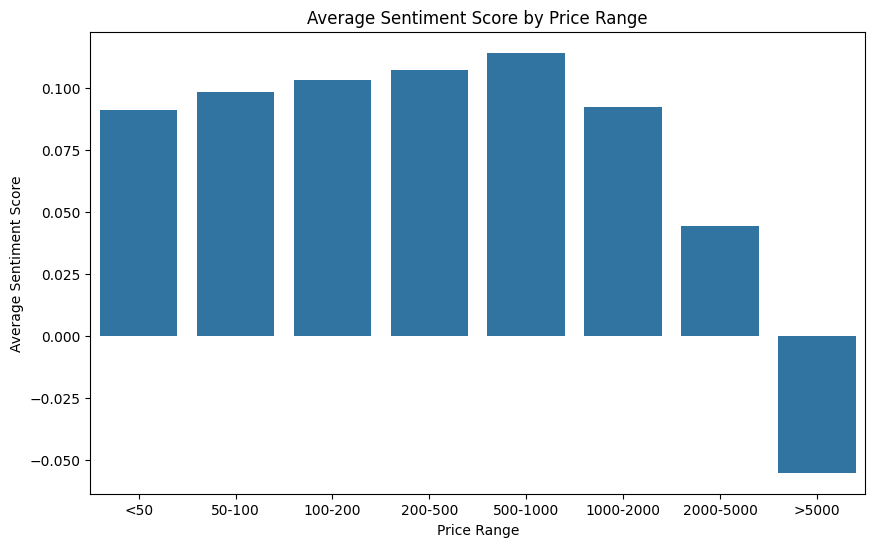

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-51-e8eb7f480920>:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['cleaned_review'] = filtered_data['review_comment_message'].apply(preprocess_text)


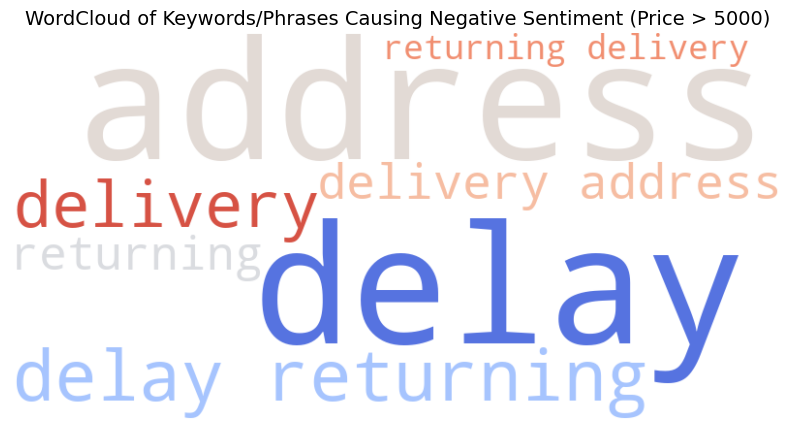

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import string

# Set the folder path
folder_path = '/content/drive/MyDrive/olist_data'

# List all CSV files in the folder
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Load each CSV file into a dictionary of DataFrames
dataframes = {}
for file in files:
    file_path = os.path.join(folder_path, file)
    df_name = file.split('.')[0]  # Use filename (without .csv) as the key
    dataframes[df_name] = pd.read_csv(file_path, encoding='latin-1')

order_items = dataframes['olist_order_items_dataset']
order_payments = dataframes['olist_order_payments_dataset']
order_reviews = dataframes['olist_order_reviews_dataset']
products = dataframes['olist_products_dataset']
product_category_name_translation = dataframes['product_category_name_translation']

# Merge datasets to get the necessary columns
merged_data = pd.merge(order_items, order_payments, on='order_id')
merged_data = pd.merge(merged_data, order_reviews[['order_id', 'review_score', 'review_comment_message']], on='order_id')

sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment score from review text
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

# Apply sentiment analysis to the review_comment_message column
merged_data['sentiment_score'] = merged_data['review_comment_message'].apply(lambda x: get_sentiment_score(str(x)))

# Define price ranges for categorization
price_bins = [0, 50, 100, 200, 500, 1000, 2000, 5000, 7000]
price_labels = ['<50', '50-100', '100-200', '200-500', '500-1000', '1000-2000', '2000-5000', '>5000']
merged_data['price_range'] = pd.cut(merged_data['price'], bins=price_bins, labels=price_labels, right=False)

# Compare sentiment score against price ranges
sentiment_by_price_range = merged_data.groupby('price_range')['sentiment_score'].mean().reset_index()

# Plot sentiment score against price ranges
plt.figure(figsize=(10,6))
sns.barplot(x='price_range', y='sentiment_score', data=sentiment_by_price_range)
plt.title('Average Sentiment Score by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Sentiment Score')
plt.show()

filtered_data = merged_data[(merged_data['price'] > 5000) & (merged_data['sentiment_score'] < 0)]

# Step 2: Preprocess the text for keyword extraction (remove punctuation, stopwords, etc.)
nltk.download('stopwords')
from nltk.corpus import stopwords

# Define function for text preprocessing
def preprocess_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(f"[{string.punctuation}]", " ", text)  # Remove punctuation
    words = text.split()  # Split into words
    stop_words = set(stopwords.words('english'))  # Define stop words
    words = [word for word in words if word not in stop_words]  # Remove stop words
    return ' '.join(words)

# Apply preprocessing to the review comments
filtered_data['cleaned_review'] = filtered_data['review_comment_message'].apply(preprocess_text)

# Step 3: Use TF-IDF Vectorizer to extract key phrases
vectorizer = TfidfVectorizer(max_features=100, ngram_range=(1, 2))  # Use unigrams and bigrams
X = vectorizer.fit_transform(filtered_data['cleaned_review'])

# Get the feature names (words/phrases)
feature_names = vectorizer.get_feature_names_out()

# Get the corresponding TF-IDF scores
tfidf_scores = X.sum(axis=0).A1  # Summing the tf-idf scores for each feature

# Step 4: Sort and extract the top keywords/phrases
keyword_scores = zip(feature_names, tfidf_scores)
sorted_keywords = sorted(keyword_scores, key=lambda x: x[1], reverse=True)

# Extract keywords and their corresponding scores for WordCloud
keywords_dict = dict(sorted_keywords)

# Step 5: Create a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm').generate_from_frequencies(keywords_dict)

# Step 6: Display the WordCloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for a cleaner look
plt.title('WordCloud of Keywords/Phrases Causing Negative Sentiment (Price > 5000)', fontsize=14)
plt.show()